In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [41]:
def mask_preparation(data, size):
  """ creates a distribution mask from a file, normalizing the original values """
  data = pd.read_csv(data, sep=" ", header=None)
  minimal_el = data.min(axis = 1).min()
  max_el = data.max(axis = 1).max()
  data = (data - minimal_el)/(max_el - minimal_el)
  mask = data.to_numpy()
  mask = np.array(Image.fromarray(mask).resize(size, Image.BILINEAR))
  mask = mask[:,:,np.newaxis]
  return(mask)


In [42]:
def bright_image(image_path, size):
  """ creates a fully illuminated image using augmentation RandomBrightnessContrast  """
  img = Image.open(image_path)
  out = img.resize(size)
  img_np = np.array(out)
  image = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
  transform = A.Compose([ A.RandomBrightnessContrast(always_apply= True, p=1.0, brightness_limit=(1.0, 1.0), contrast_limit=(1.0, 1.0))])
  transformed = transform(image=image)
  src_light = transformed['image']
  src_light_  = cv2.cvtColor(src_light, cv2.COLOR_RGB2BGR)
  return(src_light_)

In [43]:
def final_image(src_light, mask, src1):
  """ applies a mask according to the formula below, saves the final image """
  dst = src_light * mask + src1 * (1 - mask)
  Image.fromarray(dst.astype(np.uint8)).save('final.jpg')
  image = Image.open('final.jpg')
  return(image)

In [44]:
def initial_picture(path, size):
  """ brings the original image to the desired size and returns it as np.array """
  img = Image.open(path)
  out = img.resize(size)
  img_np = np.array(out)
  # return(np.array(Image.open(path)))
  return(img_np)

In [45]:
def process(data, image, size):
  mask_ = mask_preparation(data, size)
  src_light_ = bright_image(image, size)
  src1_ = initial_picture(image, size)
  # print(final_image(src_light_, mask_, src1_))
  return(final_image(src_light_, mask_, src1_))

Applying mask from detector-data-100m.txt distribution to green color 


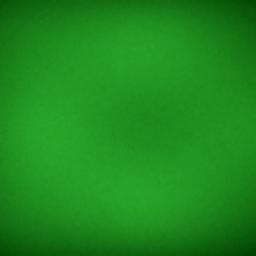

In [38]:
print('Applying mask from detector-data-100m.txt distribution to green color ')
process('detector-data-100m.txt', 'green.png', (256,256))

Applying mask from detector-data-100m.txt distribution to  color 


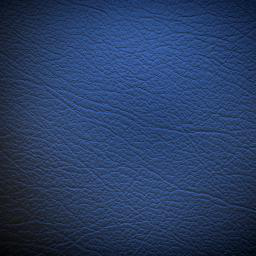

In [46]:
print('Applying mask from detector-data-100m.txt distribution to  color ')
process('detector-data-100m.txt', 'blue.jpg', (256,256))